In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
tscv = TimeSeriesSplit(n_splits=5)
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
import joblib
from datetime import datetime
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import requests

In [2]:
import requests
from io import BytesIO
import pandas as pd

download_url = "https://docs.google.com/spreadsheets/d/1_VOH-B079z_HeFzNkM6Y827pKpLhR_d1/export?format=xlsx"

# Set a timeout for the request (e.g., 10 seconds)
timeout_seconds = 10

# Try to download the Excel file with retry logic
retries = 3  # Number of retries if the request fails
for attempt in range(retries):
    try:
        response = requests.get(download_url, timeout=timeout_seconds)
        if response.status_code == 200:  # If successful
            file_content = response.content
            excel_file = pd.ExcelFile(BytesIO(file_content))
            index_data = pd.read_excel(excel_file, sheet_name='Index')
            macro_data = pd.read_excel(excel_file, sheet_name='Macro')
            break
    except requests.Timeout:
        print(f"Request timed out on attempt {attempt + 1}. Retrying...")
    except requests.RequestException as e:
        print(f"An error occurred: {e}")
else:
    print("Failed to download the Excel file after several attempts.")


macro_data['Month'] = pd.to_datetime(macro_data['Month'])

filtered_macro_df = macro_data[macro_data['Month'] > '1989-08-31']


In [3]:
import pandas as pd

# Assuming index_data and filtered_macro_df are already loaded and filtered as needed

# Ensure 'Dates' column in index_data is a datetime type for proper indexing
index_data['Dates'] = pd.to_datetime(index_data['Dates'])
index_data_monthly = index_data.set_index('Dates').resample('M').mean()

# Ensure the date column in filtered_macro_df is a datetime type and set as index
# Ensure this column name matches the actual date column in your filtered_macro_df
filtered_macro_df['Month'] = pd.to_datetime(filtered_macro_df['Month'])
macro_data_monthly = filtered_macro_df.set_index('Month')

# Merge the two datasets on their date index
combined_data = pd.merge(index_data_monthly, macro_data_monthly, left_index=True, right_index=True)

# Drop any rows with missing data to clean up
combined_data = combined_data.dropna()

# Displaying the first few rows of the combined dataset to verify the merge
combined_data.tail()

C:\Users\kulka\AppData\Local\Temp\ipykernel_6860\4169833907.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_data_monthly = index_data.set_index('Dates').resample('M').mean()
C:\Users\kulka\AppData\Local\Temp\ipykernel_6860\4169833907.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_macro_df['Month'] = pd.to_datetime(filtered_macro_df['Month'])


,Consumer Discretionary (Sector) (^SP500-25) - Index Value,Consumer Staples (Sector) (^SP500-30) - Index Value,Energy (Sector) (^SP500-10) - Index Value,Financials (Sector) (^SP500-40) - Index Value,Health Care (Sector) (^HCX) - Index Value,Industrials (Sector) (^SP500-20) - Index Value,Information Technology (Sector) (^SP500-45) - Index Value,Materials (Sector) (^SP500-15) - Index Value,GDP,Unemployment,Interest Rates,Vix Rates,Oil Prices,Industrial Production Output,Production Price Index,CPI Data
2023-09-30,1263.995960,727.356966,694.191362,552.160441,1534.936717,857.571692,2905.564303,494.544661,27833.100000,6347,5.33,17.52,89.43,103.2974,258.934,307.789
2023-10-31,1207.027887,717.393426,652.013045,537.671467,1584.076360,832.105733,2903.536032,478.637739,27944.600000,6443,5.33,18.14,85.64,102.5502,255.192,307.671
2023-11-30,1336.906550,744.257676,641.283524,595.093812,1550.132444,902.924057,3273.076173,517.201677,28021.933333,6262,5.33,12.92,77.69,102.9955,252.926,307.051
2023-12-31,1418.085139,762.324059,640.048054,626.349319,1535.169829,964.727850,3397.155113,539.621937,28099.266667,6268,5.33,12.45,71.90,102.6920,249.892,306.746
2024-02-29,1485.370000,788.910000,660.810000,668.560000,1702.790000,1026.200000,3815.250000,533.030000,28210.000000,6970,5.33,13.40,83.17,102.2600,258.450,311.050


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa.seasonal import seasonal_decompose


combined_data.dropna(inplace=True)
index_columns = [col for col in combined_data.columns if 'Index' in col]
macro_columns = [col for col in combined_data.columns if col not in index_columns and col != 'Dates']


#scaling the features for better analysis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_data[macro_columns])
X_scaled_df = pd.DataFrame(X_scaled, index=combined_data.index, columns=macro_columns)

# Empty Dictionaries to append any new information into them
lasso_features = {}
model_performance = {}


for index_col in index_columns:
    # Shift y by one month to predict next month's index prices
    y = combined_data[index_col].shift(-1)
    y.dropna(inplace=True)

    lasso = LassoCV(cv=5, random_state=42, max_iter=10000)
    lasso.fit(X_scaled_df.loc[y.index], y)
    significant_features = [macro_columns[i] for i, coef in enumerate(lasso.coef_) if coef != 0]
    lasso_features[index_col] = significant_features

    if not significant_features:
        continue 

    X_significant = X_scaled_df.loc[y.index][significant_features]

    decomposition = seasonal_decompose(y, model='additive', period=12)
    y_deseasonalized = y - decomposition.seasonal - decomposition.trend
    y_deseasonalized.dropna(inplace=True)

    common_index = y_deseasonalized.index.intersection(X_significant.index)
    X_final = X_significant.loc[common_index]
    y_final = y_deseasonalized.loc[common_index]

    # Splitting the data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

    tscv = TimeSeriesSplit(n_splits=5)
    model = GradientBoostingRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 7]
    }
    grid_search = GridSearchCV(model, param_grid, cv=tscv, scoring='r2')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    seasonal_trend = decomposition.seasonal.loc[X_test.index] + decomposition.trend.loc[X_test.index]
    seasonal_trend = seasonal_trend.dropna()
    y_pred = best_model.predict(X_test) + seasonal_trend
    model_performance[index_col] = r2_score(y.loc[X_test.index], y_pred)

significant_features = []
for index, features in lasso_features.items():
    feature_description = f"{index}: {features}"
    significant_features.append(feature_description)

# Identifying the factors for each index
print("Significant features for each index:")
for feature in significant_features:
    print(feature)

# Printing the model performance for each index
print("\nModel performance (R^2) for each index:")
for index, r2 in model_performance.items():
    print(f"{index}: {r2}")


Significant features for each index:
Consumer Discretionary (Sector) (^SP500-25) - Index Value: ['GDP', 'Unemployment', 'Vix Rates', 'Oil Prices', 'Industrial Production Output', 'CPI Data']
Consumer Staples (Sector) (^SP500-30) - Index Value: ['GDP', 'Unemployment', 'Interest Rates', 'Vix Rates', 'Oil Prices', 'Industrial Production Output']
Energy (Sector) (^SP500-10) - Index Value: ['Vix Rates', 'Oil Prices', 'Industrial Production Output', 'CPI Data']
Financials (Sector) (^SP500-40) - Index Value: ['GDP', 'Unemployment', 'Industrial Production Output']
Health Care (Sector) (^HCX) - Index Value: ['GDP', 'Unemployment', 'Vix Rates', 'Oil Prices', 'Industrial Production Output', 'CPI Data']
Industrials (Sector) (^SP500-20) - Index Value: ['GDP', 'Unemployment', 'Interest Rates', 'Vix Rates', 'Oil Prices', 'Industrial Production Output']
Information Technology (Sector) (^SP500-45) - Index Value: ['GDP', 'Unemployment', 'Interest Rates', 'Vix Rates', 'Oil Prices', 'Industrial Production

In [5]:
significant_features = {
    'Consumer Discretionary (Sector) (^SP500-25)': ['GDP', 'Unemployment', 'Vix Rates', 'Oil Prices', 'Industrial Production Output', 'CPI Data'],
    'Consumer Staples (Sector) (^SP500-30)': ['GDP', 'Unemployment', 'Interest Rates', 'Vix Rates', 'Oil Prices', 'Industrial Production Output'],
    'Energy (Sector) (^SP500-10)': ['Vix Rates', 'Oil Prices', 'Industrial Production Output', 'CPI Data'],
    'Financials (Sector) (^SP500-40)': ['GDP', 'Unemployment', 'Industrial Production Output'],
    'Health Care (Sector) (^HCX)': ['GDP', 'Unemployment', 'Vix Rates', 'Oil Prices', 'Industrial Production Output', 'CPI Data'],
    'Industrials (Sector) (^SP500-20)': ['GDP', 'Unemployment', 'Interest Rates', 'Vix Rates', 'Oil Prices', 'Industrial Production Output'],
    'Information Technology (Sector) (^SP500-45)': ['GDP', 'Unemployment', 'Interest Rates', 'Vix Rates', 'Oil Prices', 'Industrial Production Output'],
    'Materials (Sector) (^SP500-15)': ['GDP', 'Unemployment', 'Interest Rates', 'Vix Rates', 'Oil Prices', 'Industrial Production Output'],
}

def fetch_feature_data(significant_features, latest_macro_data):
    fetched_data = {}
    for index, features in significant_features.items():
        fetched_data[index] = {feature: latest_macro_data.get(feature, 0) for feature in features}
    return fetched_data

#inputtting the current month Macro data to predict the next month macro data
latest_macro_data = {
    'GDP': 28210,
    'Unemployment': 6970,
    'Interest Rates': 5.33,
    'Vix Rates': 13.4,
    'Oil Prices': 83.17,
    'Industrial Production Output': 102.2600,
    'Production Price Index': 258.450,
    'CPI Data': 311.050
}
# FEtching data for each index
index_feature_data = fetch_feature_data(significant_features, latest_macro_data)

# Printing the fetched data for each index
for index, data in index_feature_data.items():
    print(f"{index}:")
    print(data)

Consumer Discretionary (Sector) (^SP500-25):
{'GDP': 28210, 'Unemployment': 6970, 'Vix Rates': 13.4, 'Oil Prices': 83.17, 'Industrial Production Output': 102.26, 'CPI Data': 311.05}
Consumer Staples (Sector) (^SP500-30):
{'GDP': 28210, 'Unemployment': 6970, 'Interest Rates': 5.33, 'Vix Rates': 13.4, 'Oil Prices': 83.17, 'Industrial Production Output': 102.26}
Energy (Sector) (^SP500-10):
{'Vix Rates': 13.4, 'Oil Prices': 83.17, 'Industrial Production Output': 102.26, 'CPI Data': 311.05}
Financials (Sector) (^SP500-40):
{'GDP': 28210, 'Unemployment': 6970, 'Industrial Production Output': 102.26}
Health Care (Sector) (^HCX):
{'GDP': 28210, 'Unemployment': 6970, 'Vix Rates': 13.4, 'Oil Prices': 83.17, 'Industrial Production Output': 102.26, 'CPI Data': 311.05}
Industrials (Sector) (^SP500-20):
{'GDP': 28210, 'Unemployment': 6970, 'Interest Rates': 5.33, 'Vix Rates': 13.4, 'Oil Prices': 83.17, 'Industrial Production Output': 102.26}
Information Technology (Sector) (^SP500-45):
{'GDP': 2821

In [6]:
#Calculating the weights for each index and understanding how much weight is assigned to each sector.

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

all_feature_weights = {}

for index, features in significant_features.items():
    
    if index + ' - Index Value' in combined_data.columns:
        X = combined_data[features] 
        y = combined_data[index + ' - Index Value'].shift(-1)

        y = y.dropna() 
        X = X.loc[y.index] 


        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Training the model
        lasso_model = LassoCV(cv=5, random_state=42)
        lasso_model.fit(X_train_scaled, y_train)

        all_feature_weights[index] = dict(zip(features, lasso_model.coef_))
    else:
        print(f"{index} - Index Value column not found in combined_data")

for index, weights in all_feature_weights.items():
    print(f"Feature weights for {index}:")
    for feature, weight in weights.items():
        print(f"  {feature}: {weight}")


c:\Users\kulka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.789e+04, tolerance: 4.545e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\kulka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.975e+03, tolerance: 5.387e+03
  model = cd_fast.enet_coordinate_descent(


Feature weights for Consumer Discretionary (Sector) (^SP500-25):
  GDP: 1139.6684877536827
  Unemployment: 3.110037372834692
  Vix Rates: 5.459638226411942
  Oil Prices: -47.85314589742515
  Industrial Production Output: -61.01970782625398
  CPI Data: -728.049543109644
Feature weights for Consumer Staples (Sector) (^SP500-30):
  GDP: 227.3217263042674
  Unemployment: -15.438374407808972
  Interest Rates: -7.861856038076565
  Vix Rates: -4.041639090515638
  Oil Prices: -29.005688899407797
  Industrial Production Output: -20.50972336914785
Feature weights for Energy (Sector) (^SP500-10):
  Vix Rates: -19.590925090670538
  Oil Prices: 94.65936978692855
  Industrial Production Output: 54.39921170435165
  CPI Data: 46.36405074035098
Feature weights for Financials (Sector) (^SP500-40):
  GDP: 61.840254744789604
  Unemployment: -50.54978730078991
  Industrial Production Output: 62.90466763190654
Feature weights for Health Care (Sector) (^HCX):
  GDP: 632.3545067608824
  Unemployment: -60.9424

In [7]:
# calculating predicted price of each index.

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import pandas as pd

model_details = {}

for index_name, features in significant_features.items():
    if not features:
        print(f"No features to model for {index_name}")
        model_details[index_name] = {'model': None, 'coefficients': {}}
        continue

    X = combined_data[features]
    index_column = f"{index_name} - Index Value"  
    y = combined_data[index_column].shift(-1)

    y = y.dropna()
    X = X.loc[:y.last_valid_index()]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=42))

    model.fit(X_train, y_train)

    model_details[index_name] = {
        'model': model,
        'coefficients': dict(zip(features, model.named_steps['lassocv'].coef_))
    }

predicted_prices = {}
for index_name, details in model_details.items():
    model = details['model']
    if model is None:
        print(f"No model to predict for {index_name}")
        continue

    features = significant_features[index_name]
    
    input_data = pd.DataFrame({feature: [latest_macro_data.get(feature, 0)] for feature in features})

    predicted_price = model.predict(input_data)
    predicted_prices[index_name] = predicted_price[0]

for index_name, price in predicted_prices.items():
    print(f"Predicted price for {index_name}: {price}")


c:\Users\kulka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.789e+04, tolerance: 4.545e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\kulka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.975e+03, tolerance: 5.387e+03
  model = cd_fast.enet_coordinate_descent(


Predicted price for Consumer Discretionary (Sector) (^SP500-25): 1402.3377178086678
Predicted price for Consumer Staples (Sector) (^SP500-30): 848.033961709034
Predicted price for Energy (Sector) (^SP500-10): 632.9749497887628
Predicted price for Financials (Sector) (^SP500-40): 552.1668498814654
Predicted price for Health Care (Sector) (^HCX): 1630.1040454438423
Predicted price for Industrials (Sector) (^SP500-20): 961.0807490985153
Predicted price for Information Technology (Sector) (^SP500-45): 2978.048503497911
Predicted price for Materials (Sector) (^SP500-15): 559.380007490699


In [8]:
#Checkign the mean, standard deviation and correlation for each index.

index_columns = [
    'Consumer Discretionary (Sector) (^SP500-25) - Index Value',
    'Consumer Staples (Sector) (^SP500-30) - Index Value',
    'Energy (Sector) (^SP500-10) - Index Value',
    'Financials (Sector) (^SP500-40) - Index Value',
    'Health Care (Sector) (^HCX) - Index Value',
    'Industrials (Sector) (^SP500-20) - Index Value',
    'Information Technology (Sector) (^SP500-45) - Index Value',
    'Materials (Sector) (^SP500-15) - Index Value',
]

index_mean = combined_data[index_columns].mean()
index_std = combined_data[index_columns].std()

index_corr = combined_data[index_columns].corr()
index_cov = combined_data[index_columns].cov()

print("Mean:\n", index_mean)
print("\nStandard Deviation:\n", index_std)
print("\nCorrelation Matrix:\n", index_corr)
print("\nCovariance Matrix:\n", index_cov)

Mean:
 Consumer Discretionary (Sector) (^SP500-25) - Index Value    422.537594
Consumer Staples (Sector) (^SP500-30) - Index Value          327.679333
Energy (Sector) (^SP500-10) - Index Value                    345.137100
Financials (Sector) (^SP500-40) - Index Value                306.163130
Health Care (Sector) (^HCX) - Index Value                    520.228349
Industrials (Sector) (^SP500-20) - Index Value               344.415622
Information Technology (Sector) (^SP500-45) - Index Value    669.438493
Materials (Sector) (^SP500-15) - Index Value                 221.942421
dtype: float64

Standard Deviation:
 Consumer Discretionary (Sector) (^SP500-25) - Index Value    379.073701
Consumer Staples (Sector) (^SP500-30) - Index Value          206.681473
Energy (Sector) (^SP500-10) - Index Value                    189.657075
Financials (Sector) (^SP500-40) - Index Value                150.320713
Health Care (Sector) (^HCX) - Index Value                    417.721462
Industrials (Sector)

In [9]:
#Printing the last line item
last_line_item = combined_data[index_columns].iloc[-1]

print("Last line item of the index prices:\n", last_line_item)

Last line item of the index prices:
 Consumer Discretionary (Sector) (^SP500-25) - Index Value    1485.37
Consumer Staples (Sector) (^SP500-30) - Index Value           788.91
Energy (Sector) (^SP500-10) - Index Value                     660.81
Financials (Sector) (^SP500-40) - Index Value                 668.56
Health Care (Sector) (^HCX) - Index Value                    1702.79
Industrials (Sector) (^SP500-20) - Index Value               1026.20
Information Technology (Sector) (^SP500-45) - Index Value    3815.25
Materials (Sector) (^SP500-15) - Index Value                  533.03
Name: 2024-02-29 00:00:00, dtype: float64


In [10]:
# Calculating returns in percentage terms

returns = {}
for index_name, last_price in last_line_item.items():
    predicted_price = predicted_prices.get(index_name.split(' - ')[0])
    if predicted_price is not None:
        returns[index_name] = (predicted_price - last_price) / last_price
    else:
        returns[index_name] = None

for index_name, return_value in returns.items():
    print(f"Return for {index_name}: {return_value}")


Return for Consumer Discretionary (Sector) (^SP500-25) - Index Value: -0.05590006677887134
Return for Consumer Staples (Sector) (^SP500-30) - Index Value: 0.07494386141516017
Return for Energy (Sector) (^SP500-10) - Index Value: -0.04212262255601021
Return for Financials (Sector) (^SP500-40) - Index Value: -0.17409529454130454
Return for Health Care (Sector) (^HCX) - Index Value: -0.04268638796102728
Return for Industrials (Sector) (^SP500-20) - Index Value: -0.06345668573522192
Return for Information Technology (Sector) (^SP500-45) - Index Value: -0.21943555376504525
Return for Materials (Sector) (^SP500-15) - Index Value: 0.04943437984859952


WEIGHT 1

In [11]:
#calculating weights of the portfolio using the returns previously calculated and correlation of each index.

import numpy as np
import pandas as pd
from scipy.optimize import minimize



variable_names = list(locals().keys())

returns = locals().get('returns', {})

standard_deviations = index_std.values
correlation_matrix = index_corr.values

covariance_matrix = np.outer(standard_deviations, standard_deviations) * correlation_matrix



def reduce_risk_via_correlation(optimal_weights, correlation_matrix):
    total_correlation = correlation_matrix.sum(axis=1)
    
    risk_adjusted_weights = optimal_weights / total_correlation
    
    risk_adjusted_weights /= risk_adjusted_weights.sum()
    
    return risk_adjusted_weights


def maximize_expected_return(weights):
    expected_return = np.dot(weights, np.array(list(returns.values())))
    return -expected_return


constraints = [
    {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},  
    {'type': 'ineq', 'fun': lambda weights: min(weights) - 0.05},  
]

bounds = [
    (0.05, 0.2) if returns[sector] < 0 else (0.05, 0.5)
    for sector in returns.keys()
]


result = minimize(
    maximize_expected_return,
    np.full(len(returns), 1 / len(returns)),
    constraints=constraints,
    bounds=bounds,
    method='SLSQP'
)


optimal_weights = result.x


risk_adjusted_weights = reduce_risk_via_correlation(optimal_weights, correlation_matrix)


expected_portfolio_return = np.dot(risk_adjusted_weights, np.array(list(returns.values())))
optimal_portfolio_std = np.sqrt(np.dot(risk_adjusted_weights, np.dot(covariance_matrix, risk_adjusted_weights)))


print("Risk-Adjusted Portfolio Weights:")
for sector, weight in zip(returns.keys(), risk_adjusted_weights):
    print(f"{sector}: {weight:.4f}")

print(f"\nExpected Return for the Portfolio: {expected_portfolio_return * 100:.4f}%")
print(f"Standard Deviation of the Portfolio: {optimal_portfolio_std/100:.4f}%")


Risk-Adjusted Portfolio Weights:
Consumer Discretionary (Sector) (^SP500-25) - Index Value: 0.0495
Consumer Staples (Sector) (^SP500-30) - Index Value: 0.4877
Energy (Sector) (^SP500-10) - Index Value: 0.0645
Financials (Sector) (^SP500-40) - Index Value: 0.0561
Health Care (Sector) (^HCX) - Index Value: 0.0488
Industrials (Sector) (^SP500-20) - Index Value: 0.0481
Information Technology (Sector) (^SP500-45) - Index Value: 0.0514
Materials (Sector) (^SP500-15) - Index Value: 0.1940

Expected Return for the Portfolio: 1.4475%
Standard Deviation of the Portfolio: 2.2536%


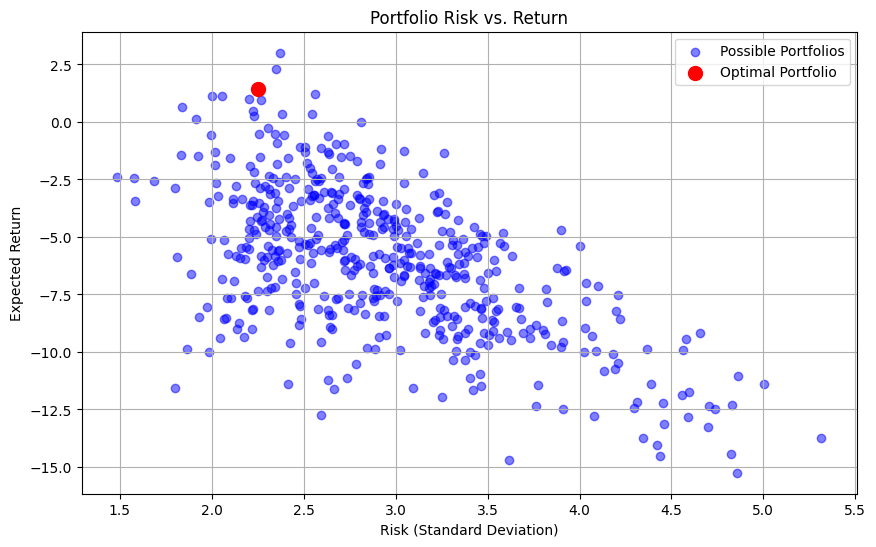

In [12]:
#plotting the possible portfolios and the model generated portfolio.

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


def portfolio_variance(weights, cov_matrix):
    return np.dot(weights, np.dot(cov_matrix, weights))


def generate_random_portfolios(num_portfolios, num_assets):
    random_weights = np.random.dirichlet(np.ones(num_assets), size=num_portfolios)
    return random_weights


def calculate_risk_return(portfolios, returns, cov_matrix):
    risks = [np.sqrt(portfolio_variance(weights, cov_matrix)) / 100 for weights in portfolios]
    portfolio_returns = [np.dot(np.array(list(returns.values())), weights) * 100 for weights in portfolios]
    return risks, portfolio_returns

optimal_weights  = locals().get('risk_adjusted_weights', {})

num_portfolios = 500


dummy_weights = generate_random_portfolios(num_portfolios, len(returns))


dummy_risks, dummy_returns = calculate_risk_return(dummy_weights, returns, covariance_matrix)
optimal_risk = np.sqrt(portfolio_variance(optimal_weights, covariance_matrix)) / 100
optimal_return = np.dot(np.array(list(returns.values())), optimal_weights) * 100


plt.figure(figsize=(10, 6))
plt.scatter(dummy_risks, dummy_returns, c='blue', alpha=0.5, label='Possible Portfolios')
plt.scatter(optimal_risk, optimal_return, c='red', s=100, marker='o', label='Optimal Portfolio')
plt.title('Portfolio Risk vs. Return')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()
